# **Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**


In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using a synthetic data set as an example.

## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

## **Generate synthetic dataset**

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

## **Add noisy features to make the problem more difficult** $^1$


In [3]:
import numpy as np

In [4]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

## **Data splitting**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

## **Build classification model**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### Random Forest

In [8]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [9]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

## **Prediction probabilities** $^2$

In [11]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [12]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

## **Computing AUROC and ROC curve values**

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC**
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [14]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)

### **Print AUROC scores**

In [15]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.912
Naive Bayes: AUROC = 0.993
K Nearest Neighbors: AUROC = 0.580


### **Calculate ROC curve**

In [16]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

In [17]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00483092, 0.00483092, 0.00483092, 0.00483092,
        0.0531401 , 0.0531401 , 0.06280193, 0.06280193, 0.08695652,
        0.08695652, 0.12560386, 0.12560386, 0.2705314 , 0.2705314 ,
        1.        ]),
 array([0.        , 0.14507772, 0.17098446, 0.1761658 , 0.20725389,
        0.21761658, 0.21761658, 0.22279793, 0.23316062, 0.97409326,
        0.97409326, 0.97927461, 0.97927461, 0.98445596, 0.98445596,
        0.98963731, 0.98963731, 0.99481865, 0.99481865, 1.        ,
        1.        ]))

In [18]:
knn_fpr, knn_tpr

(array([0.        , 0.04347826, 0.16908213, 0.50241546, 0.79710145,
        0.97101449, 1.        ]),
 array([0.        , 0.06217617, 0.2642487 , 0.61658031, 0.88082902,
        0.97927461, 1.        ]))

## **Plot the ROC curve**

In [19]:
import matplotlib.pyplot as plt

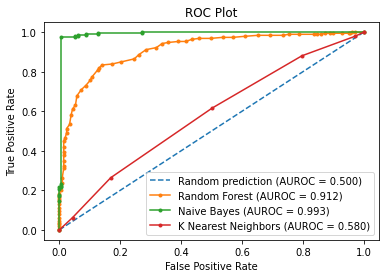

In [20]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
#plt.show()

## **Save ROC plot**

In [ ]:
from IPython.display import Image, display

### Save plot to files

In [ ]:
plt.savefig('roc.pdf')

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.savefig('roc.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
! ls -l

total 12
-rw-r--r-- 1 root root 1191 Apr 23 08:10 roc.pdf
-rw-r--r-- 1 root root 1273 Apr 23 08:10 roc.png
drwxr-xr-x 1 root root 4096 Apr  3 16:24 sample_data


### View the generated PNG and PDF files

## **Reference**
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


---